In [2]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
start_time = dt.datetime.now()

In [3]:
data = pd.read_csv('NY property data.csv')
df= pd.read_csv('NY property data.csv')

In [4]:
data.head()

,RECORD,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,...,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,...,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,...,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [5]:
numerics=['EXLAND','EXTOT','BLDFRONT','BLDDEPTH']
categoricals=['EXCD1','STADDR','ZIP','EXMPTCL']

In [6]:
categorical_data=data.loc[:,categoricals]
categorical_data

,EXCD1,STADDR,ZIP,EXMPTCL
0,4600.0,1 LIBERTY ISLAND,10004.0,X3
1,4600.0,1 ELLIS ISLAND,10004.0,X3
2,2191.0,MARGINAL STREET,10004.0,X1
3,2191.0,PIER 6,10004.0,X1
4,2231.0,BATTERY PARK,10004.0,X1
...,...,...,...,...
1070989,1017.0,142 BENTLEY STREET,10307.0,NaN
1070990,1017.0,146 BENTLEY STREET,10307.0,NaN
1070991,1015.0,150 BENTLEY STREET,10307.0,NaN
1070992,1017.0,156 BENTLEY STREET,10307.0,NaN


In [7]:
data_column=np.array(data.columns)
df=pd.DataFrame(data_column)
df[16:24]

,0
16,EXLAND
17,EXTOT
18,EXCD1
19,STADDR
20,ZIP
21,EXMPTCL
22,BLDFRONT
23,BLDDEPTH


In [8]:
data[['EXLAND','EXTOT','EXCD1','STADDR','ZIP','EXMPTCL','BLDFRONT','BLDDEPTH']]

,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH
0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,0,0
1,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,0,0
2,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004.0,X1,709,564
3,15255000.0,17640000.0,2191.0,PIER 6,10004.0,X1,85,551
4,121050000.0,122535000.0,2231.0,BATTERY PARK,10004.0,X1,89,57
...,...,...,...,...,...,...,...,...
1070989,1620.0,1620.0,1017.0,142 BENTLEY STREET,10307.0,NaN,30,26
1070990,1620.0,1620.0,1017.0,146 BENTLEY STREET,10307.0,NaN,32,26
1070991,14728.0,14728.0,1015.0,150 BENTLEY STREET,10307.0,NaN,24,32
1070992,1620.0,1620.0,1017.0,156 BENTLEY STREET,10307.0,NaN,32,21


# EXLAND

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1620.0'),
  Text(2, 0, '2090.0'),
  Text(3, 0, '3240.0'),
  Text(4, 0, '5760.0'),
  Text(5, 0, '8520.0'),
  Text(6, 0, '4180.0'),
  Text(7, 0, '7380.0'),
  Text(8, 0, '10140.0'),
  Text(9, 0, '72.0'),
  Text(10, 0, '2650.0'),
  Text(11, 0, '3120.0'),
  Text(12, 0, '4140.0'),
  Text(13, 0, '6270.0'),
  Text(14, 0, '69750.0'),
  Text(15, 0, '2120.0'),
  Text(16, 0, '8360.0'),
  Text(17, 0, '100.0'),
  Text(18, 0, '6900.0'),
  Text(19, 0, '2620.0')])

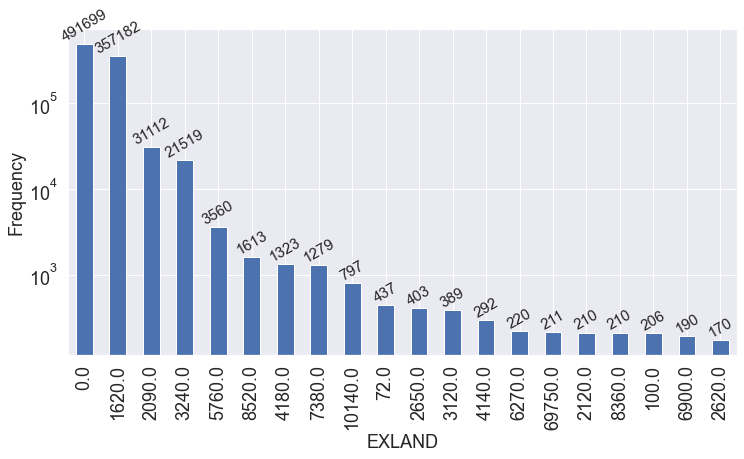

In [14]:
sns.set(font_scale=1.5)


data['EXLAND'].value_counts().head(20).plot(kind = 'bar',figsize=(12,6),fontsize=18)
arr= data['EXLAND'].value_counts().head(20)
j=0
for i in arr.index:
    plt.text(j,arr[i],arr[i],ha="center", va ="bottom", fontsize ="small", rotation = 30)
    j=j+1
    
#data['EXLAND'].value_counts().head(20).plot(kind = 'bar',figsize=(12,6),fontsize=18)
plt.yscale('log')

plt.xlabel('EXLAND',fontsize=18) 
plt.ylabel('Frequency',fontsize=18)
plt.xticks(fontsize=18)

In [101]:
print(data['EXLAND'].value_counts())

0.0        491699
1620.0     357182
2090.0      31112
3240.0      21519
5760.0       3560
            ...  
45973.0         1
41042.0         1
37028.0         1
34354.0         1
18847.0         1
Name: EXLAND, Length: 33419, dtype: int64


# EXTOT

Text(0, 0.5, 'Frequency')

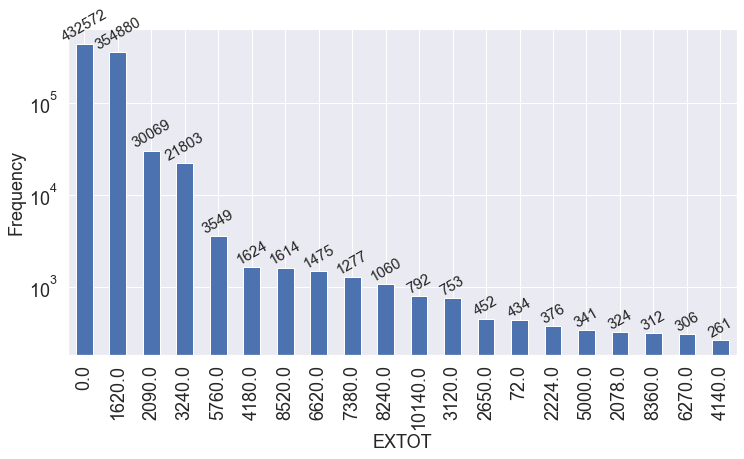

In [15]:
sns.set(font_scale=1.5)
arr= data['EXTOT'].value_counts().head(20)
j=0
for i in arr.index:
    plt.text(j,arr[i],arr[i],ha="center", va ="bottom", fontsize ="small", rotation = 30)
    j=j+1
data['EXTOT'].value_counts().head(20).plot(kind = 'bar',figsize=(12,6),fontsize=18)
plt.yscale('log')
plt.xlabel('EXTOT',fontsize=18) 
plt.ylabel('Frequency',fontsize=18)

/Users/santhoshinijayachandran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EXTOT', ylabel='Density'>

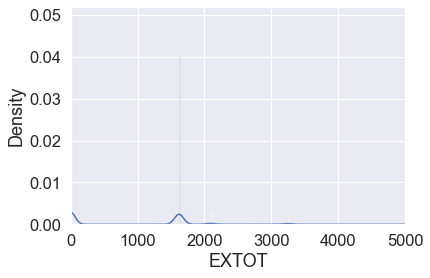

In [124]:
xhigh= 5000
plt.xlim(0,xhigh)

temp=data[data['EXTOT']<=xhigh]
sns.distplot(temp['EXTOT'],bins=500, kde=True)


In [103]:
print(data['EXTOT'].value_counts())

0.0         432572
1620.0      354880
2090.0       30069
3240.0       21803
5760.0        3549
             ...  
197442.0         1
331100.0         1
719300.0         1
50976.0          1
397554.0         1
Name: EXTOT, Length: 64255, dtype: int64


In [104]:
data[['EXLAND','EXTOT','EXCD1','STADDR','ZIP','EXMPTCL','BLDFRONT','BLDDEPTH']]

,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH
0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,0,0
1,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,0,0
2,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004.0,X1,709,564
3,15255000.0,17640000.0,2191.0,PIER 6,10004.0,X1,85,551
4,121050000.0,122535000.0,2231.0,BATTERY PARK,10004.0,X1,89,57
...,...,...,...,...,...,...,...,...
1070989,1620.0,1620.0,1017.0,142 BENTLEY STREET,10307.0,NaN,30,26
1070990,1620.0,1620.0,1017.0,146 BENTLEY STREET,10307.0,NaN,32,26
1070991,14728.0,14728.0,1015.0,150 BENTLEY STREET,10307.0,NaN,24,32
1070992,1620.0,1620.0,1017.0,156 BENTLEY STREET,10307.0,NaN,32,21


# EXCD1

Text(0, 0.5, 'Frequency')

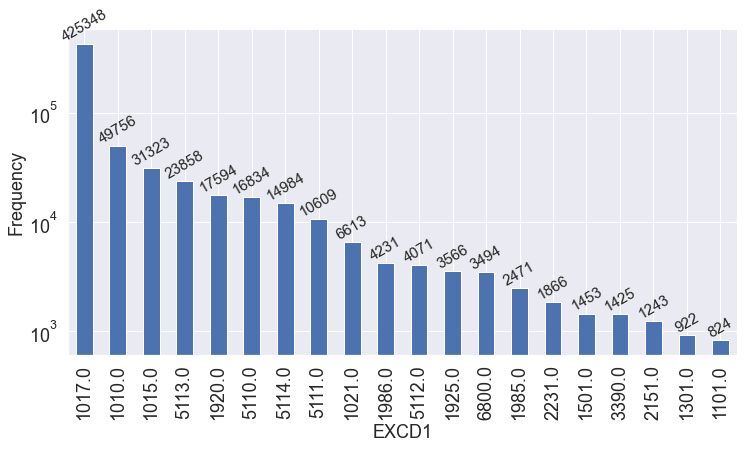

In [16]:
sns.set(font_scale=1.5)
arr= data['EXCD1'].value_counts().head(20)
j=0
for i in arr.index:
    plt.text(j,arr[i],arr[i],ha="center", va ="bottom", fontsize ="small", rotation = 30)
    j=j+1
data['EXCD1'].value_counts().head(20).plot(kind = 'bar',figsize=(12,6),fontsize=18)
plt.yscale('log')
plt.xlabel('EXCD1',fontsize=18) 
plt.ylabel('Frequency',fontsize=18)

Text(0, 0.5, 'Frequency')

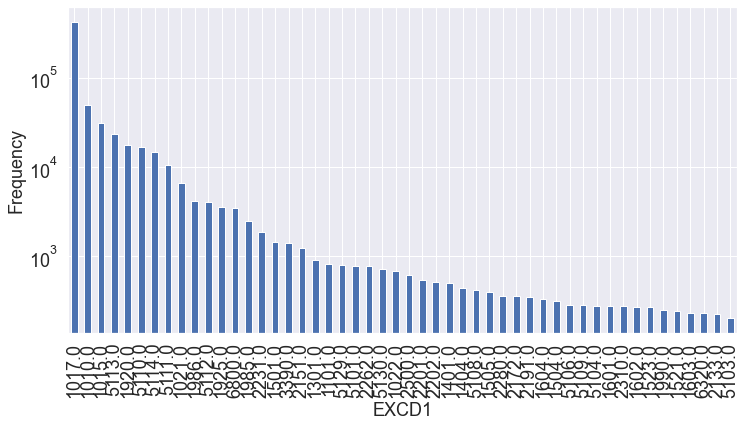

In [106]:
sns.set(font_scale=1.5)
data['EXCD1'].value_counts().head(50).plot(kind = 'bar',figsize=(12,6),fontsize=18)
plt.yscale('log')
plt.xlabel('EXCD1',fontsize=18) 
plt.ylabel('Frequency',fontsize=18)

/Users/santhoshinijayachandran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


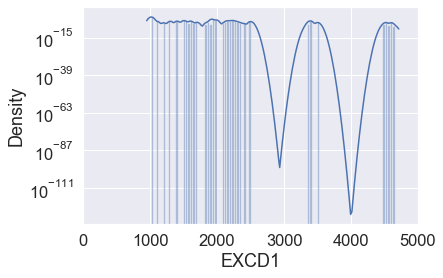

In [107]:
xhigh= 5000
plt.xlim(0,xhigh)

temp=data[data['EXCD1']<=xhigh]
sns.distplot(temp['EXCD1'],bins=100, kde=True)
plt.yscale('log')

In [108]:
print(data['EXCD1'].value_counts())

1017.0    425348
1010.0     49756
1015.0     31323
5113.0     23858
1920.0     17594
           ...  
1606.0         1
4650.0         1
1841.0         1
1562.0         1
1992.0         1
Name: EXCD1, Length: 129, dtype: int64


# STADDR

Text(0, 0.5, 'Frequency')

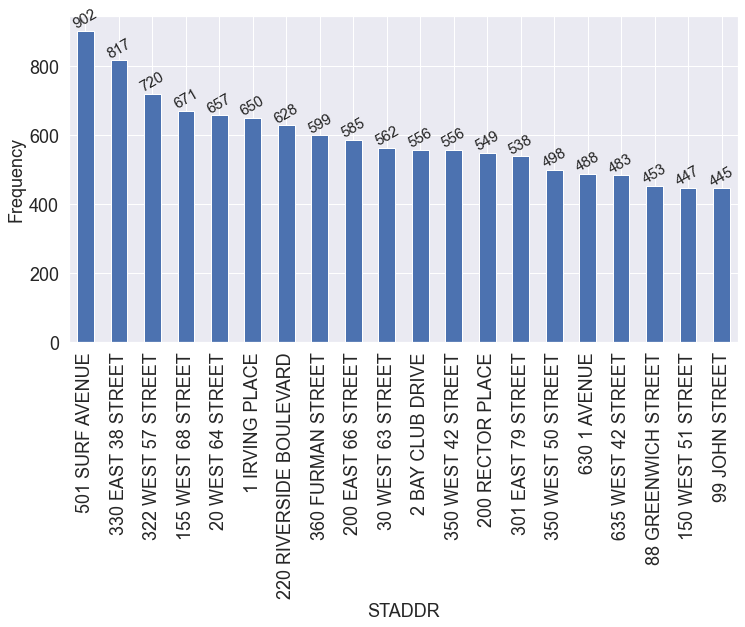

In [17]:
sns.set(font_scale=1.5)
arr= data['STADDR'].value_counts().head(20)
j=0
for i in arr.index:
    plt.text(j,arr[i],arr[i],ha="center", va ="bottom", fontsize ="small", rotation = 30)
    j=j+1
data['STADDR'].value_counts().head(20).plot(kind = 'bar',figsize=(12,6),fontsize=18)
#plt.yscale('log')
plt.xlabel('STADDR',fontsize=18) 
plt.ylabel('Frequency',fontsize=18)

In [110]:
print(data['STADDR'].value_counts())

501 SURF AVENUE       902
330 EAST 38 STREET    817
322 WEST 57 STREET    720
155 WEST 68 STREET    671
20 WEST 64 STREET     657
                     ... 
1349 55 STREET          1
1347 55 STREET          1
1345 55 STREET          1
1343 55 STREET          1
162 BENTLEY STREET      1
Name: STADDR, Length: 839280, dtype: int64


# ZIP

Text(0, 0.5, 'Frequency')

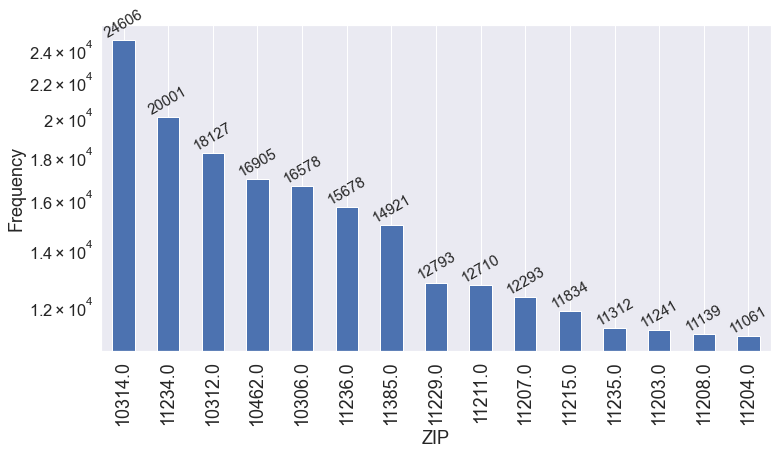

In [19]:
sns.set(font_scale=1.5)
arr= data['ZIP'].value_counts().head(15)
j=0
for i in arr.index:
    plt.text(j,arr[i],arr[i],ha="center", va ="bottom", fontsize ="small", rotation = 30)
    j=j+1
data['ZIP'].value_counts().head(15).plot(kind = 'bar',figsize=(12,6),fontsize=18)
plt.yscale('log')
plt.xlabel('ZIP',fontsize=18) 
plt.ylabel('Frequency',fontsize=18)

In [112]:
print(data['ZIP'].value_counts())

10314.0    24606
11234.0    20001
10312.0    18127
10462.0    16905
10306.0    16578
           ...  
11359.0        1
11005.0        1
10162.0        1
11352.0        1
11241.0        1
Name: ZIP, Length: 196, dtype: int64


# EXMPTCL

Text(0, 0.5, 'Frequency')

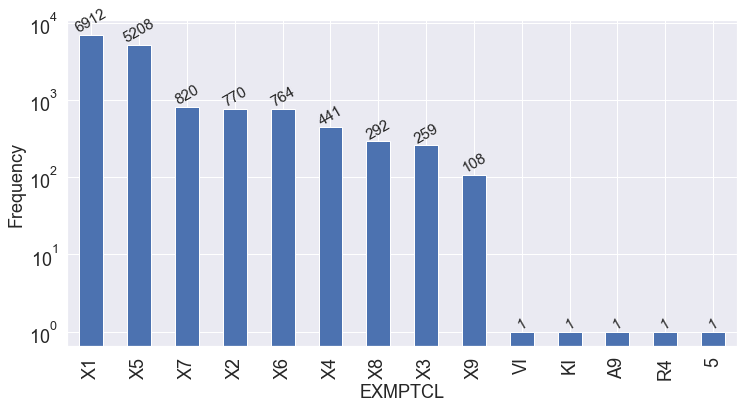

In [20]:
sns.set(font_scale=1.5)
arr= data['EXMPTCL'].value_counts().head(15)
j=0
for i in arr.index:
    plt.text(j,arr[i],arr[i],ha="center", va ="bottom", fontsize ="small", rotation = 30)
    j=j+1
data['EXMPTCL'].value_counts().head(15).plot(kind = 'bar',figsize=(12,6),fontsize=18)
plt.yscale('log')
plt.xlabel('EXMPTCL',fontsize=18) 
plt.ylabel('Frequency',fontsize=18)

In [114]:
print(data['EXMPTCL'].value_counts())

X1    6912
X5    5208
X7     820
X2     770
X6     764
X4     441
X8     292
X3     259
X9     108
VI       1
KI       1
A9       1
R4       1
5        1
Name: EXMPTCL, dtype: int64


# BLDFRONT

Text(0, 0.5, 'Frequency')

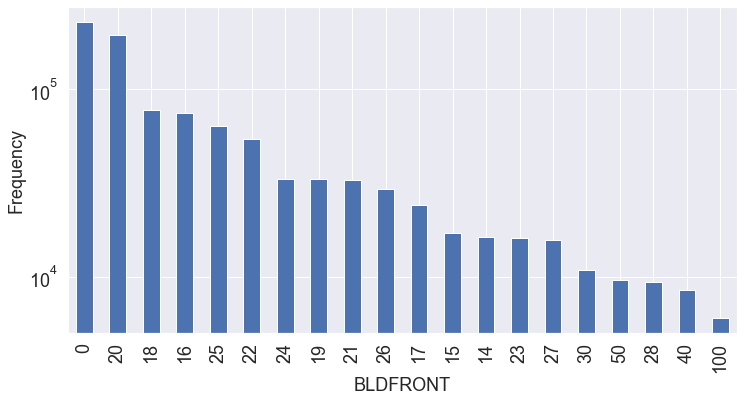

In [115]:
sns.set(font_scale=1.5)
data['BLDFRONT'].value_counts().head(20).plot(kind = 'bar',figsize=(12,6),fontsize=18)
plt.yscale('log')
plt.xlabel('BLDFRONT',fontsize=18) 
plt.ylabel('Frequency',fontsize=18)

In [116]:
print(data['BLDFRONT'].value_counts())

0       228815
20      195101
18       77705
16       74687
25       63684
         ...  
618          1
1169         1
635          1
549          1
1818         1
Name: BLDFRONT, Length: 612, dtype: int64


# BLDDEPTH

Text(0, 0.5, 'Frequency')

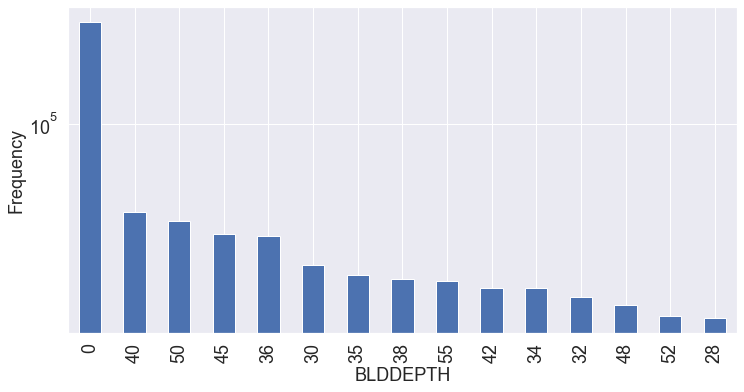

In [117]:
sns.set(font_scale=1.5)
data['BLDDEPTH'].value_counts().head(15).plot(kind = 'bar',figsize=(12,6),fontsize=18)
plt.yscale('log')
plt.xlabel('BLDDEPTH',fontsize=18) 
plt.ylabel('Frequency',fontsize=18)

In [118]:
print(data['BLDDEPTH'].value_counts())

0       228853
40       48775
50       45358
45       40670
36       40109
         ...  
5000         1
581          1
438          1
475          1
780          1
Name: BLDDEPTH, Length: 621, dtype: int64
